# Introdução

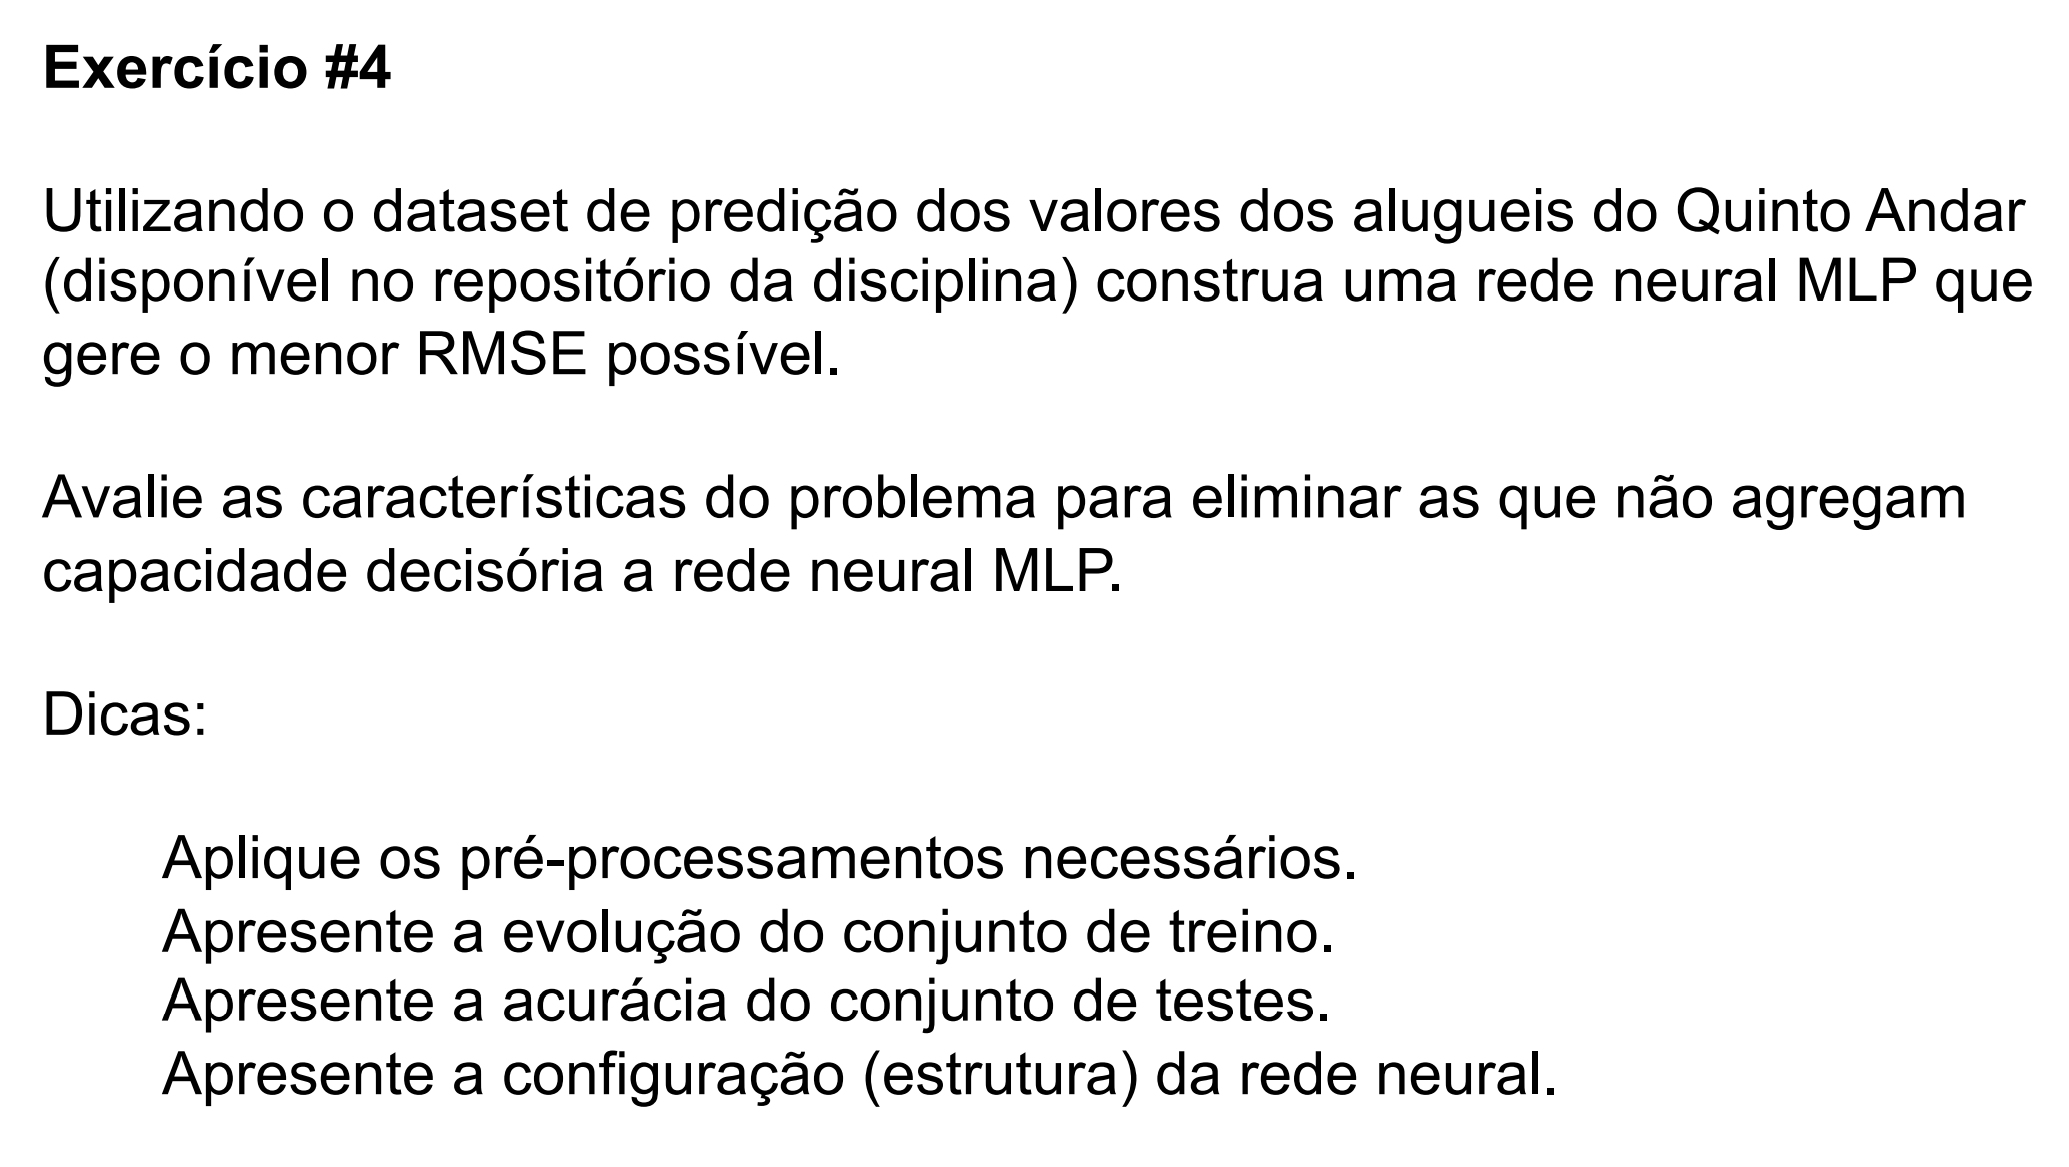

# Bicliotecas e Funções

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt 
import tensorflow as tf

from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
import random

# Define a semente com o valor 42
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
pd.options.display.float_format = '{:.2f}'.format

# Código

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/KValim/Projetcs/main/FIAP/deep%20learning%20I/quinto_andar/houses_to_rent_fiap.csv', sep = ';')
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$),fire insurance (R$),rent amount (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,211,42,3300
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,1750,63,4960
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,0,41,2800
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,22,17,1112
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,25,11,800
...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,24,22,1478
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,973,191,15000
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,332,78,6000
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,279,155,12000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   property tax (R$)    10692 non-null  int64 
 10  fire insurance (R$)  10692 non-null  int64 
 11  rent amount (R$)     10692 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1002.5+ KB


## Tratamento dos Dados

### floor
floor deveria ser int, mas está como object

In [6]:
df['floor'].unique()

array(['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

Duas coisas estranhas

- **'-'** talvez seja a presentação de casa
- **'301'** pesquisando no google, o predio mais alto de SP tem  84 andares
    https://g1.globo.com/sc/santa-catarina/noticia/2022/12/23/predio-mais-alto-do-brasil-com-290-metros-de-altura-e-inaugurado-em-balneario-camboriu.ghtml

#### -

In [7]:
df[df['floor']=='-'].count()

city                   2461
area                   2461
rooms                  2461
bathroom               2461
parking spaces         2461
floor                  2461
animal                 2461
furniture              2461
hoa (R$)               2461
property tax (R$)      2461
fire insurance (R$)    2461
rent amount (R$)       2461
dtype: int64

Pela grande quantidade de linhas com '-', acredito que não sejam erros de digitação, mas casas. Vou substituir por 0.

In [8]:
df["floor"] = df["floor"].replace('-', '0')
df.floor.unique()

array(['7', '20', '6', '2', '1', '0', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

#### 301

In [9]:
df[(df['floor']=='301')]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$),fire insurance (R$),rent amount (R$)
2562,Belo Horizonte,80,3,2,2,301,acept,not furnished,750,164,35,2600


Resolvi remover, por termos uma grande quantidade de dados, essa unica linha não vale o esforço de tentar descobrir/enquadrar no andar correto.

In [10]:
df = df[(df['floor']!='301')]
df = df.reset_index(drop=True)
df['floor'] = df['floor'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10691 entries, 0 to 10690
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10691 non-null  object
 1   area                 10691 non-null  int64 
 2   rooms                10691 non-null  int64 
 3   bathroom             10691 non-null  int64 
 4   parking spaces       10691 non-null  int64 
 5   floor                10691 non-null  int32 
 6   animal               10691 non-null  object
 7   furniture            10691 non-null  object
 8   hoa (R$)             10691 non-null  int64 
 9   property tax (R$)    10691 non-null  int64 
 10  fire insurance (R$)  10691 non-null  int64 
 11  rent amount (R$)     10691 non-null  int64 
dtypes: int32(1), int64(8), object(3)
memory usage: 960.6+ KB


## label encoding

In [11]:
not_continuous = []
for col in df.columns:
    try:
        df[col] = df[col].str.replace(',','.')
        df[col] = df[col].astype(float)
    except:
        not_continuous.append(col)
        pass

In [12]:
from sklearn.preprocessing import LabelEncoder

# Inicializa o objeto LabelEncoder
le = LabelEncoder()

for col in not_continuous:
    # Aplica o LabelEncoder na coluna desejada do dataframe
    df[col] = le.fit_transform(df[col])
    df

df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$),fire insurance (R$),rent amount (R$)
0,4,58,1,0,1,7,0,0,1219,211,39,692
1,4,303,3,3,0,20,0,1,823,1053,60,885
2,2,68,0,0,1,6,0,1,700,0,38,603
3,2,39,1,0,0,2,0,1,106,22,14,165
4,4,13,0,0,0,1,1,1,0,25,8,63
...,...,...,...,...,...,...,...,...,...,...,...,...
10686,2,51,1,0,1,5,1,0,213,24,19,285
10687,4,270,3,3,4,17,0,1,1437,808,183,1185
10688,3,58,2,2,0,8,1,0,687,332,75,951
10689,3,108,1,1,2,8,0,0,1023,279,151,1154


Adicionarei uma coluna tipo, onde 0 é casa e acima de 0 é predio. Na intenção de substituir a coluna floor por ela. Talvez seja melhor para a predição lidar com uma coluna de 2 possibilidade, do que outra com varias, no final com a mesma inteção. É de conhecimento que o quanto mais alto o floor, mais caro é o apartamento, mas como casas estão sendo consideradas, talvez seja melhor usar a floor numa análise específica de apartamentos.

In [13]:
df["tipo"] = df["floor"].apply(lambda x: 0 if x == 0 else 1)
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$),fire insurance (R$),rent amount (R$),tipo
0,4,58,1,0,1,7,0,0,1219,211,39,692,1
1,4,303,3,3,0,20,0,1,823,1053,60,885,1
2,2,68,0,0,1,6,0,1,700,0,38,603,1
3,2,39,1,0,0,2,0,1,106,22,14,165,1
4,4,13,0,0,0,1,1,1,0,25,8,63,1


## Explore

## Correlação

[Text(0.5, 0, 'city'),
 Text(1.5, 0, 'area'),
 Text(2.5, 0, 'rooms'),
 Text(3.5, 0, 'bathroom'),
 Text(4.5, 0, 'parking spaces'),
 Text(5.5, 0, 'floor'),
 Text(6.5, 0, 'animal'),
 Text(7.5, 0, 'furniture'),
 Text(8.5, 0, 'hoa (R$)'),
 Text(9.5, 0, 'property tax (R$)'),
 Text(10.5, 0, 'fire insurance (R$)'),
 Text(11.5, 0, 'rent amount (R$)'),
 Text(12.5, 0, 'tipo')]

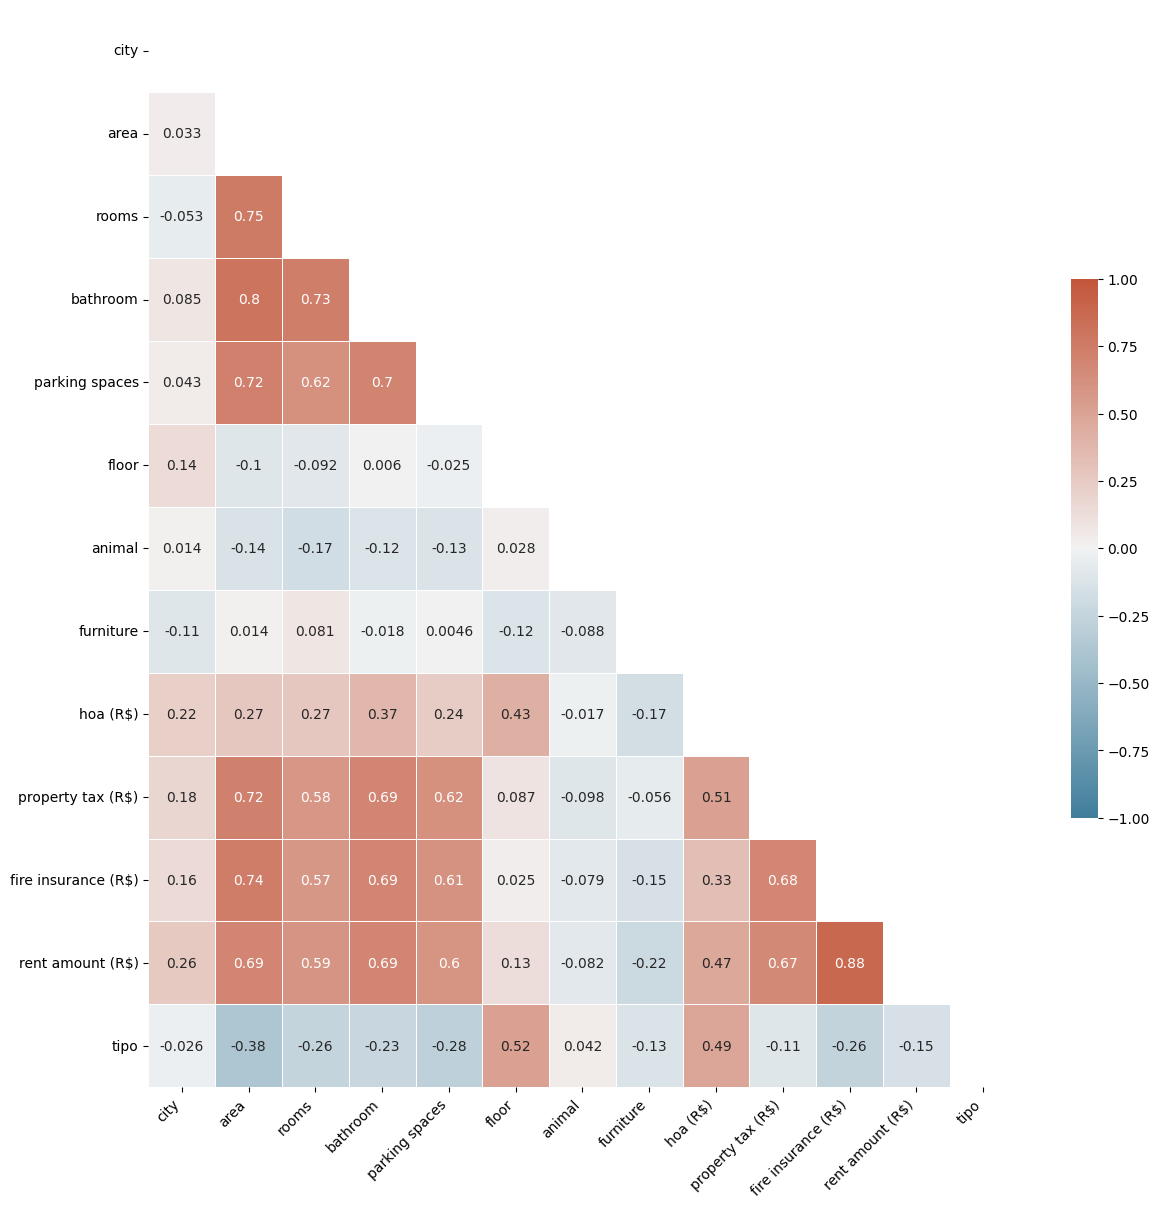

In [14]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize = (14, 14))
corr_mat = df.corr()
ax = sns.heatmap(corr_mat, 
                 vmin=-1, vmax=1, center=0, 
                 xticklabels = corr_mat.columns, 
                 yticklabels = corr_mat.columns, 
                 annot=True,
                 cmap=cmap,
                 linewidths=.5,
                 mask=mask,
                 cbar_kws={"shrink": .5})

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

A correlação que mais salta aos olhos é a relação entre rent amount e fire insurance. Talvez retirar o fire insurence.

## Plots

In [15]:
# continous_features = list(set(df.columns)- set(not_continuous))
continous_features = list(set(df.columns))
continous_features

['rooms',
 'city',
 'hoa (R$)',
 'floor',
 'property tax (R$)',
 'fire insurance (R$)',
 'tipo',
 'parking spaces',
 'animal',
 'rent amount (R$)',
 'bathroom',
 'furniture',
 'area']

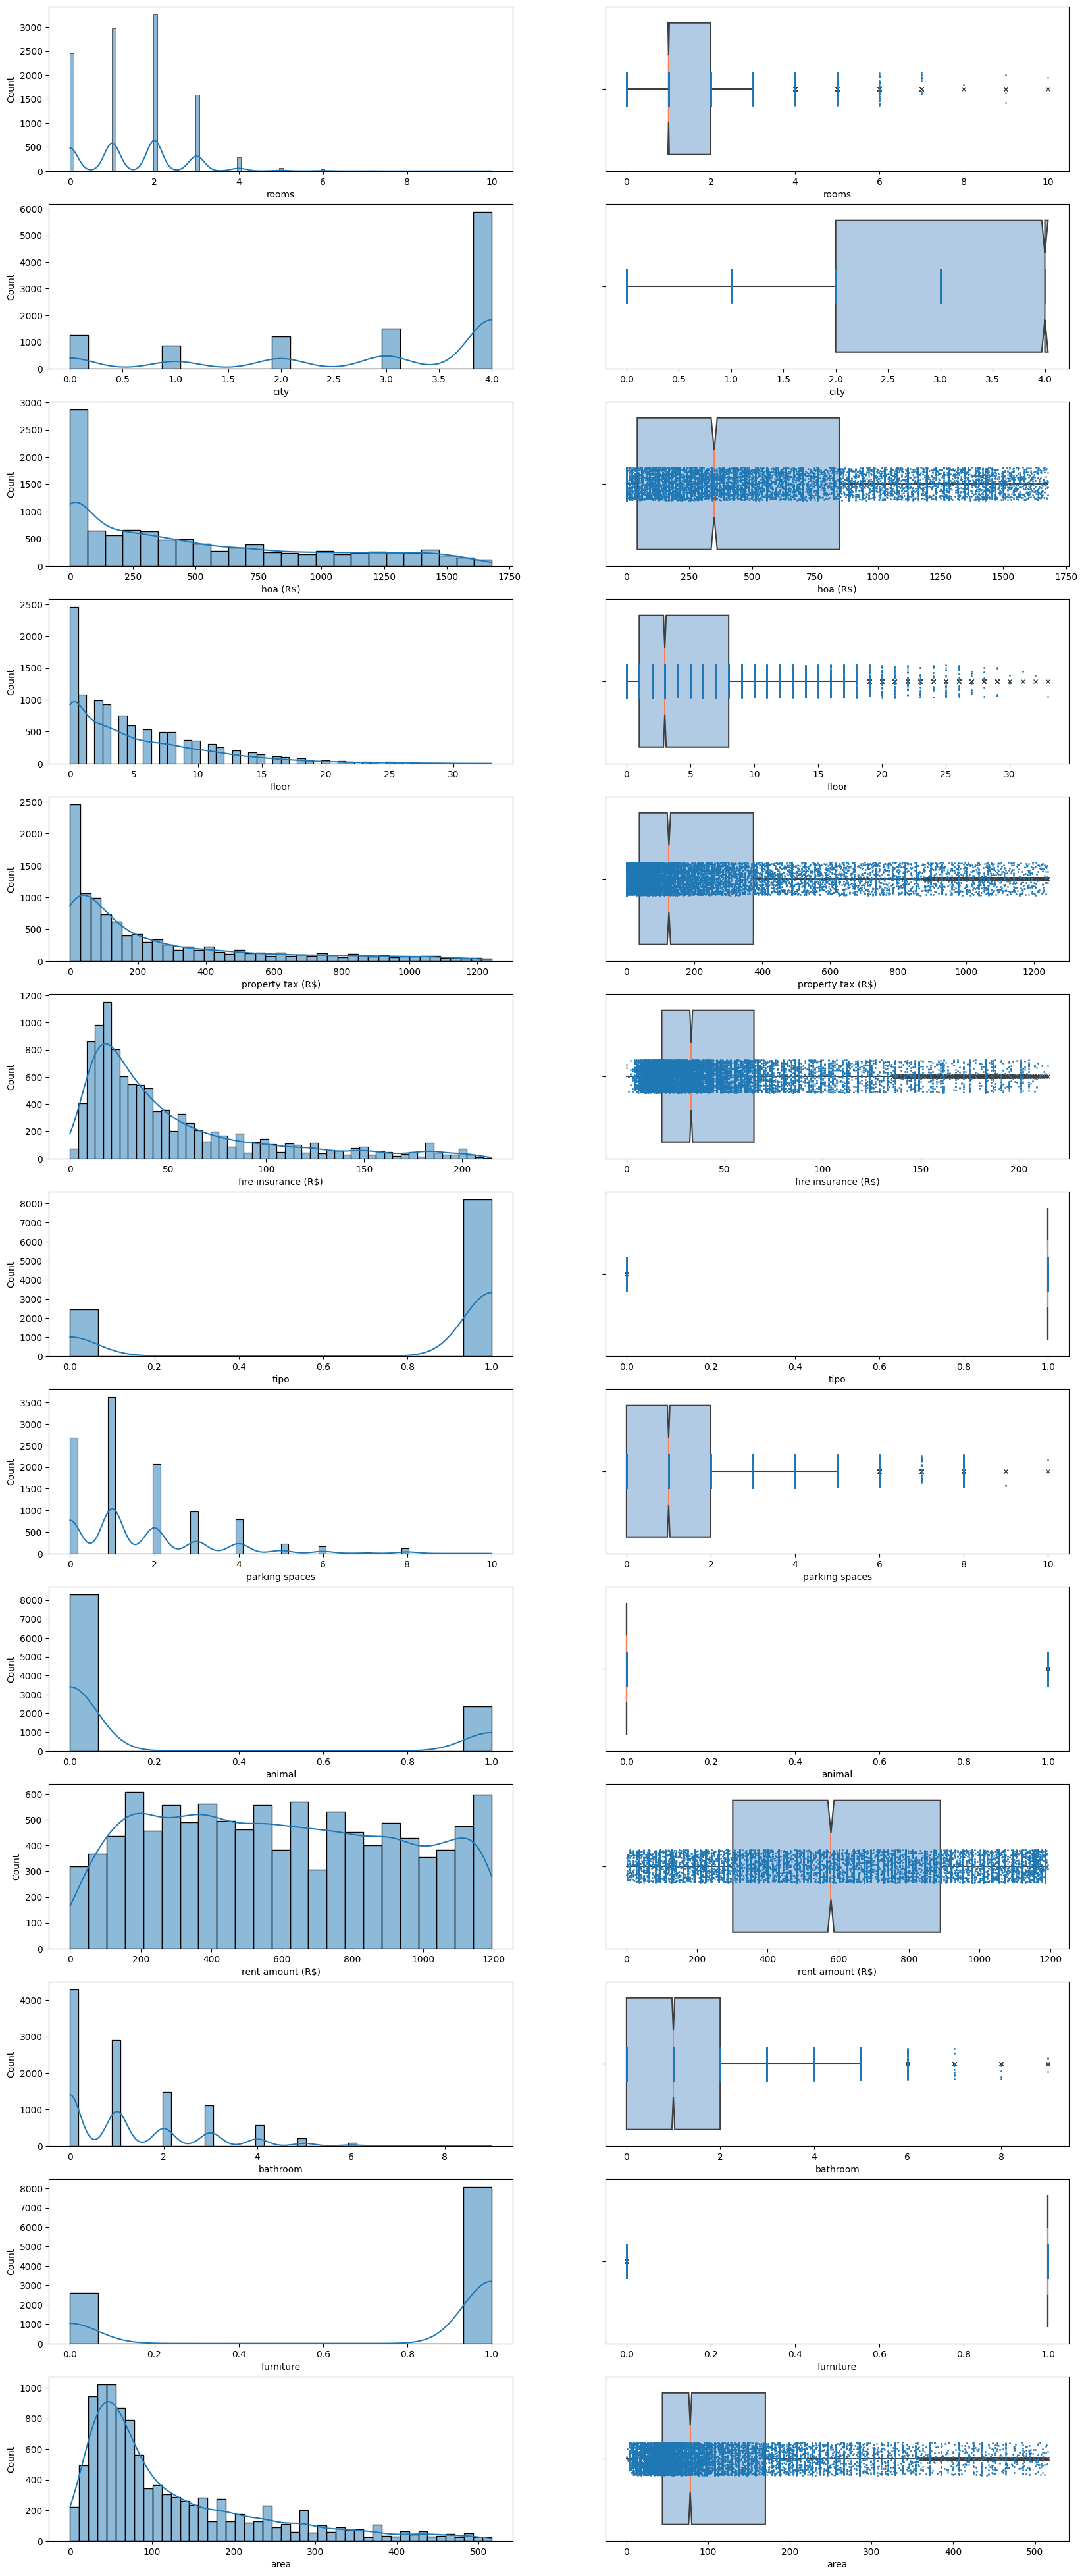

In [16]:
tamanho_figsize = len(continous_features)
fig, axes = plt.subplots(nrows=len(continous_features),ncols=2,  figsize=(20, 50))

for i in range(len(continous_features)):
    feature = continous_features[i]
    # plt.figure(figsize = (5, 5))
    data=df.copy()
    
    sns.histplot(x=data[feature], ax=axes[i][0], kde=True)
    sns.boxplot(x=data[feature], ax=axes[i][1], notch=True, showcaps=False, flierprops={"marker": "x"}, boxprops={"facecolor": (.4, .6, .8, .5)}, medianprops={"color": "coral"})
    # Gráfico de disperção
    sns.stripplot(x=data[feature], ax=axes[i][1], size=2) 

Os gráficos boxplot demonstram que existem uma grande quantidade de outliers, que talvez diminua a saúde do dataset para o treinamento.

Uma solução seria criar ranges e classificações, por exemplo, para a area, criar agrupar por pequeno (<50), médio (>=50 e <=150) e grande (>150).

## Split Train Test

In [17]:
# separa do dados em features e target
X = df.drop("rent amount (R$)", axis=1)
y = df["rent amount (R$)"]

In [18]:
# # separa os dados de treino e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Em seguida, padronizaremos os dados, mudando a escala através do StandardScaler

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
epochs = 1000

## Modelo 1

In [21]:
# Criação da rede neural
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compilação da rede
model.compile(loss=tf.keras.metrics.mean_squared_error, optimizer='adam',
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

# add callbacks
earlystopper = EarlyStopping(patience=10)

callbacks = [earlystopper]

# train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/1000
268/268 [==============================] - 1s 1ms/step - loss: 375494.4688 - rmse: 612.7761 - val_loss: 158050.9688 - val_rmse: 397.5562
Epoch 2/1000
268/268 [==============================] - 0s 1ms/step - loss: 78195.3516 - rmse: 279.6343 - val_loss: 55341.5078 - val_rmse: 235.2478
Epoch 3/1000
268/268 [==============================] - 0s 1ms/step - loss: 38839.9336 - rmse: 197.0785 - val_loss: 31800.2578 - val_rmse: 178.3263
Epoch 4/1000
268/268 [==============================] - 0s 1ms/step - loss: 25664.7773 - rmse: 160.2023 - val_loss: 24246.3301 - val_rmse: 155.7123
Epoch 5/1000
268/268 [==============================] - 0s 1ms/step - loss: 21113.3555 - rmse: 145.3044 - val_loss: 21100.6777 - val_rmse: 145.2607
Epoch 6/1000
268/268 [==============================] - 0s 1ms/step - loss: 18748.5332 - rmse: 136.9253 - val_loss: 18754.5703 - val_rmse: 136.9473
Epoch 7/1000
268/268 [==============================] - 0s 978us/step - loss: 16732.5488 - rmse: 129.3544 - va

In [25]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred.round()))

67/67 [==============================] - 0s 564us/step
              precision    recall  f1-score   support

       -75.0       0.00      0.00      0.00         0
       -23.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         4
         3.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         5
        11.0       0.00      0.00      0.00         2
        13.0       0.00      0.00      0.00         1
        15.0       0.00      0.00      0.00         0
        16.0       0.00      0.00      0.00         0
        17.0       0.00      0.00      0.00         2
        18.0       0.00      0.00      0.00         5
        19.0       0.00      0.00      0.00         1
        20.0       0.00      0.00      0.00         1
        21.0       0.00   

c:\Users\KAIQUEHENRIQUEVALIM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KAIQUEHENRIQUEVALIM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KAIQUEHENRIQUEVALIM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control t

## Conclusão parcial

O modelo obteve uma acurária de **73,76% de acurácia** sobre os dados de validação.

Mas como são muitas combinações possíveis na construção da arquitetura do modelo, a seguir vou utilizar o método de GridSearch para acha um modelo ótimo.

### GridSearchCV

GridSearchCV to search for the best neural network architecture and hyperparameters for your dataset:

In [26]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam

# define the model
def create_model(num_layers=1, num_units=32, activation='relu', lr=0.01):
    model = Sequential()
    for _ in range(num_layers):
        model.add(Dense(num_units, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer='adam', loss=tf.keras.metrics.mean_squared_error, metrics=['accuracy', tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    return model

# create the wrapper
model_wrapper = KerasClassifier(build_fn=create_model, epochs=1000, batch_size=16, verbose=0)

# define the grid search parameters
params = {'num_layers': [1, 2, 3],
          'num_units': [16, 32, 64],
          'activation': ['relu', 'tanh', 'sigmoid'],
          'lr': [0.0001, 0.001, 0.01]}

# create the grid search
grid = GridSearchCV(estimator=model_wrapper, param_grid=params, cv=5, n_jobs=-1, error_score='raise')

earlystopper = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
callbacks = [earlystopper]

# fit the grid search
grid_result = grid.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=callbacks)

# summarize the results
print(f'Melhor Score: {grid_result.best_score_}\nParametros: {grid_result.best_params_}')

C:\Users\KAIQUEHENRIQUEVALIM\AppData\Local\Temp\ipykernel_10732\1088752086.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_wrapper = KerasClassifier(build_fn=create_model, epochs=1000, batch_size=16, verbose=0)


Melhor Score: 0.0025700934464111926
Parametros: {'activation': 'relu', 'lr': 0.0001, 'num_layers': 1, 'num_units': 16}


In [36]:
grid_result.score

<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise',
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021DCA23AE60>,
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh', 'sigmoid'],
                         'lr': [0.0001, 0.001, 0.01], 'num_layers': [1, 2, 3],
                         'num_units': [16, 32, 64]})>

In [49]:
#Linear regression
from sklearn.pipeline import  Pipeline
from category_encoders import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
pip_LR = Pipeline(steps=[
                          ('ohe', OneHotEncoder()),
                          ('Std', StandardScaler()),
                          ('LR', LinearRegression())
])
pip_LR.fit(X_train, y_train)
y_previsto = pip_LR.predict(X_test)
print({'r2':r2_score(y_test, y_pred), 
           'MAE': mean_absolute_error(y_test,y_pred), 
           'RMSE':(mean_squared_error(y_test, y_pred))**2
           })

{'r2': 0.9890038015164963, 'MAE': 16.292215796484463, 'RMSE': 1503728.6156795349}


C:\Users\KAIQUEHENRIQUEVALIM\AppData\Local\Temp\ipykernel_10732\1445770737.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test,hist=False,kde =True,color ="r",label ="Valor Real")
C:\Users\KAIQUEHENRIQUEVALIM\AppData\Local\Temp\ipykernel_10732\1445770737.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147

<AxesSubplot: xlabel='rent amount (R$)', ylabel='Density'>

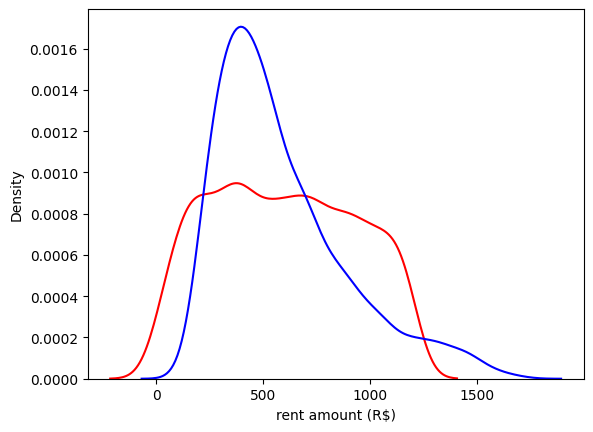

In [52]:
#ploting the model prediction with the y_test values the check the model prediction power
ax1 = sns.distplot(y_test,hist=False,kde =True,color ="r",label ="Valor Real")
sns.distplot(pip_LR.predict(X_test),color ="b",hist = False,kde =True, label = "Valor Previsto",ax =ax1)

# Conclusão